<a href="https://colab.research.google.com/github/taniyathakur45/tree-species-classifier/blob/main/Tree_Species_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Albuquerque_Final_2022-06-18.csv to Albuquerque_Final_2022-06-18.csv


In [3]:
import pandas as pd

df = pd.read_csv('Albuquerque_Final_2022-06-18.csv')
df.head()


,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,retired_date,location_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population
0,6/17/2020,inventory_date,Locust,NaN,Albuquerque,New Mexico,-106.568366,35.060456,NaN,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/9/2020,inventory_date,Oak,Quercus,Albuquerque,New Mexico,-106.655037,35.139272,1641 Tierra Del Rio Northwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/3/2020,inventory_date,Ash,Fraxinus,Albuquerque,New Mexico,-106.581127,35.052176,Us Veterans Hospital Loop,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/2020,inventory_date,Scotch pine,Pinus sylvestris,Albuquerque,New Mexico,-106.575056,35.052450,1606 San Pedro Drive Southeast,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/29/2020,inventory_date,Honeylocust,Gleditsia triacanthos,Albuquerque,New Mexico,-106.716539,35.149632,5700 Bogart Street Northwest,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[['common_name', 'scientific_name', 'condition', 'longitude_coordinate', 'latitude_coordinate']]
df.dropna(inplace=True)  # Remove missing rows
df.head()


/tmp/ipython-input-1995707388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Remove missing rows


,common_name,scientific_name,condition,longitude_coordinate,latitude_coordinate
2,Ash,Fraxinus,dead/dying,-106.581127,35.052176
3,Scotch pine,Pinus sylvestris,dead/dying,-106.575056,35.052450
4,Honeylocust,Gleditsia triacanthos,good,-106.716539,35.149632
5,Honeylocust,Gleditsia triacanthos,good,-106.716640,35.149744
6,Elm hybrid,Ulmus,good,-106.716441,35.150121


In [6]:
from sklearn.preprocessing import LabelEncoder

le_common = LabelEncoder()
df['common_name'] = le_common.fit_transform(df['common_name'])

le_sci = LabelEncoder()
df['scientific_name'] = le_sci.fit_transform(df['scientific_name'])

le_cond = LabelEncoder()
df['condition'] = le_cond.fit_transform(df['condition'])


/tmp/ipython-input-3843216089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['common_name'] = le_common.fit_transform(df['common_name'])
/tmp/ipython-input-3843216089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scientific_name'] = le_sci.fit_transform(df['scientific_name'])
/tmp/ipython-input-3843216089.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [7]:
X = df.drop('common_name', axis=1)
y = df['common_name']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Proper way to define input shape
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y.unique()), activation='softmax')
])


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 96)             │         6,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,648 (61.12 KB)

 Trainable params: 15,392 (60.12 KB)

 Non-trainable params: 256 (1.00 KB)

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0906 - loss: 4.3655 - val_accuracy: 0.2053 - val_loss: 4.2317
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2729 - loss: 3.1675 - val_accuracy: 0.2747 - val_loss: 3.9086
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3263 - loss: 2.7077 - val_accuracy: 0.2853 - val_loss: 3.5986
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3640 - loss: 2.4433 - val_accuracy: 0.3040 - val_loss: 3.3122
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4207 - loss: 2.2469 - val_accuracy: 0.3280 - val_loss: 3.0037
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4083 - loss: 2.1917 - val_accuracy: 0.3280 - val_loss: 2.7367
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4367 - loss: 2.0224 - val_accuracy: 0.4053 - val_loss: 2.5371
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4662 - loss: 1.9021 - val_accuracy: 0.3813 - val_loss:

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4199 - loss: 2.1656 
Test Accuracy: 43.71%


In [16]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_classes))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        11
           9       0.37      0.50      0.42        28
          10       0.57      0.87      0.69        31
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.50      0.25      0.33         8
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         1
          19       0.11      0.20      0.14         5
          20      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


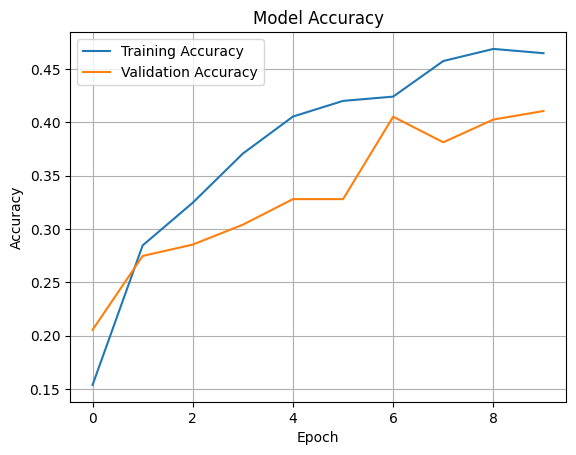

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
